# 3. Feature Engineering

In this notebook, we create new features to improve the model.

In [47]:
import sys
sys.path.append('..')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Loading data

In [48]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')

## Creating new features

In [49]:
def create_features(df):   
    """
    Create the following features:
    - Monthly_Payment: Monthly payment for the loan
    - Total_Income: The sum of applicant and co-applicant income
    - Amount_Income_Ratio: The ratio between the monthly payment and the total income
    - Amount_Income_Ratio_Percent: The ratio between the monthly payment and the total income, mapped between 0 and 1.
    """ 
    df["Monthly_Payment"] = df.LoanAmount / df.Loan_Amount_Term
    df["Total_Income"] = df.ApplicantIncome + df.CoapplicantIncome

    df["Amount_Income_Ratio"] = df.Monthly_Payment  / df.Total_Income

    # Map the values between 0 and 100%
    min_value = df["Amount_Income_Ratio"].min()
    max_value = df["Amount_Income_Ratio"].max()

    df["Amount_Income_Ratio_Percent"] = ((df["Amount_Income_Ratio"] - min_value) / (max_value - min_value))

    # Drop the Amount_Income_Ratio column
    df = df.drop("Amount_Income_Ratio", axis=1)

    return df

train_df = create_features(train_df)
val_df = create_features(val_df)

## Looking for correlations

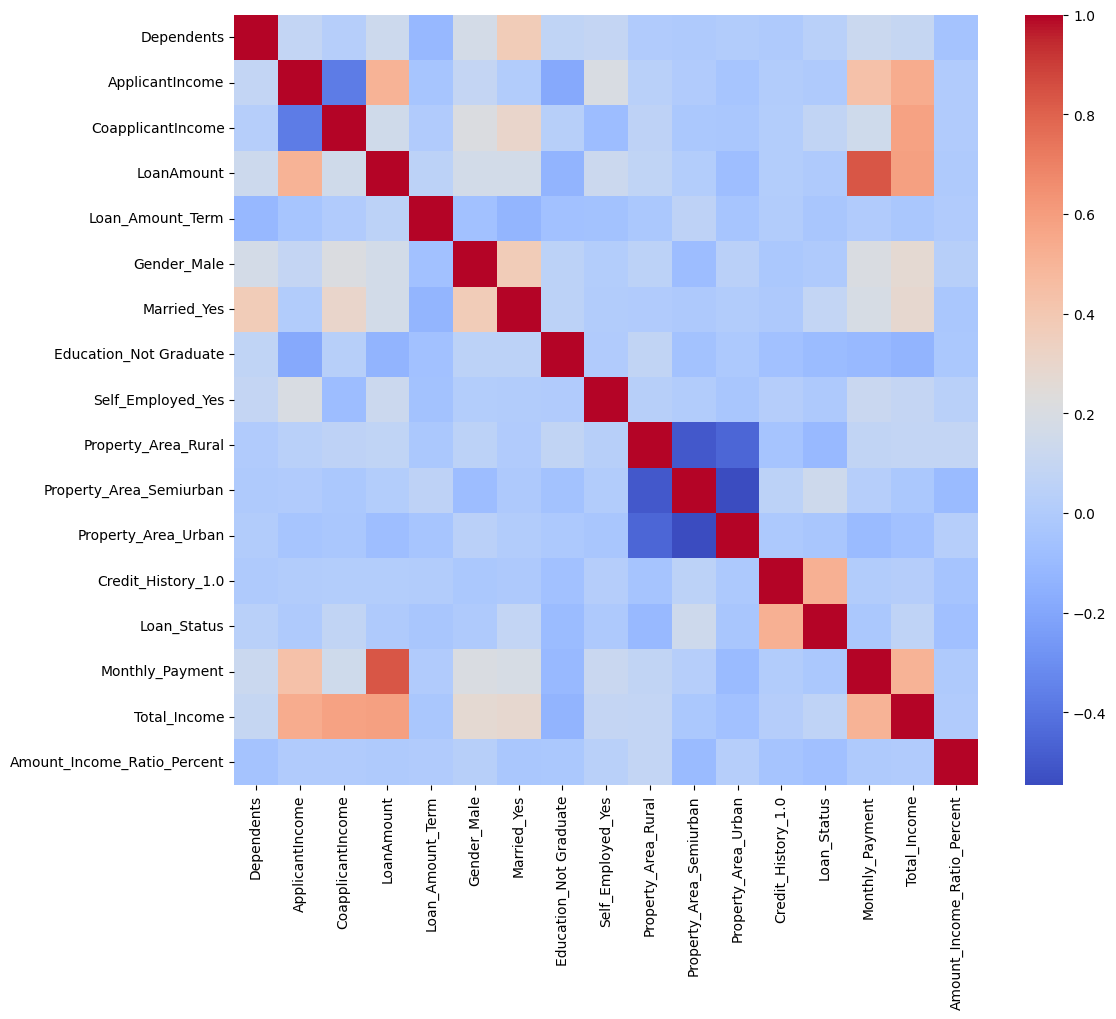

In [50]:
# visualize the correlation using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=False, cmap='coolwarm')
plt.show()

**Remove "Monthly_Payment" since it is correlated with "Loan_Amount"**

In [51]:
train_df.drop(["Monthly_Payment"], axis=1, inplace=True)
val_df.drop(["Monthly_Payment"], axis=1, inplace=True)

## Save the preprocessed data

In [52]:
train_df.to_csv('../data/engineered/train.csv', index=False)
val_df.to_csv('../data/engineered/val.csv', index=False)